# Thyroid Disease Detection

*Thyroid disease records supplied by the Garavan Institute and J. Ross
Quinlan, New South Wales Institute, Syndney, Australia,
1987. Then it was modified for unsupervised anomaly detection by Goldstein Markus et al. in 2015."*

This directory contains the latest version of an archive of thyroid diagnoses obtained from the Garvan Institute, consisting of 9172 records from 1984 to early 1987.  Each record looks like

	(29 attribute values), diagnoses [record identification]
    
The attributes are given in order and separated by commas. Unknown attribute values are indicated by question marks.

![Image](https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2018/07/13/Pictures/thyroid_8d093330-868b-11e8-bbc3-e5c02a79570e.jpg)

### Reference
- [1] Goldstein M, Uchida S. A comparative evaluation of unsupervised anomaly detection algorithms for multivariate data[J]. PloS one, 2016, 11(4): e0152173.
- [2] Schiffmann W, Joost M, Werner R. Synthesis and performance analysis of multilayer neural network architectures[J]. 1992.
- [3] Goldstein, Markus, 2015, "annthyroid-unsupervised-ad.tab", Unsupervised Anomaly Detection Benchmark, https://doi.org/10.7910/DVN/OPQMVF/CJURKL, Harvard Dataverse, V1, UNF:6:jJUwpBJ4iBlQto8WT6zsUg== [fileUNF]

## Objective Statement:
This primary project aims to utilize machine learning to significantly improve the accuracy and efficiency
of thyroid disorder detection. By employing advanced algorithms and data analytics, the goal is to develop a robust
and reliable system capable of analyzing diverse medical data, including thyroid function tests and imaging results. The
key focus is on creating a machine learning-based solution that can assist healthcare professionals in early and
accurate identification of thyroid disorders, leading to timely interventions and improved patient outcomes.


#### Thyroid Detection Dataset Overview

The Thyroid Detection dataset, sourced from the UCI Machine Learning Repository and made available on Kaggle,
comprises 9172 observations with 31 attributes. The dataset is intended for the development and evaluation of
machine learning models to detect thyroid disorders. Each observation represents a patient, and the attributes include
demographic information, medical history, laboratory test results, and the target variable indicating the presence of
hyperthyroidism.

#### Key Attributes:
**1. Demographic Information:**
- *Age:* The age of the patient (integer).
- *Sex:* Gender identification of the patient (string).

**2. Medical History:**
- *On_thyroxine:* Boolean indicating whether the patient is on thyroxine.
- *Query_on_thyroxine:* Boolean indicating queries regarding thyroxine usage.
- *On_antithyroid_meds:* Boolean indicating whether the patient is on antithyroid medications.
- *Sick:* Boolean indicating whether the patient is sick.
- *Pregnant:* Boolean indicating whether the patient is pregnant.
- *Thyroid_surgery:* Boolean indicating whether the patient has undergone thyroid surgery.
- *I131_treatment:* Boolean indicating whether the patient is undergoing I131 treatment.
- *Query_hypothyroid:* Boolean indicating the patient's belief of having hypothyroidism.
- *Lithium:* Boolean indicating whether the patient uses lithium.
- *Goitre:* Boolean indicating whether the patient has goitre.
- *Tumor:* Boolean indicating whether the patient has a tumor.
- *Hypopituitary:* Float value indicating a condition related to the hyperpituitary gland.
- *Psych:* Boolean indicating a psychological condition.

**3. Laboratory Test Results:**
- *TSH_measured:* Boolean indicating whether TSH was measured.
- *TSH:* Float value representing the TSH level in the blood.
- *T3_measured:* Boolean indicating whether T3 was measured.
- *T3:* Float value representing the T3 level in the blood.
- *TT4_measured:* Boolean indicating whether TT4 was measured.
- *TT4:* Float value representing the TT4 level in the blood.
- *T4U_measured:* Boolean indicating whether T4U was measured.
- *T4U:* Float value representing the T4U level in the blood.
- *FTI_measured:* Boolean indicating whether FTI was measured.
- *FTI:* Float value representing the FTI level in the blood.
- *TBG_measured:* Boolean indicating whether TBG was measured.
- *TBG:* Float value representing the TBG level in the blood.

**4. Other Attributes:**
- *Referral_source:* String indicating the source of patient referral.
- *Target:* String indicating the medical diagnosis of hyperthyroidism.
- *Patient_id:* String representing a unique identifier for each patient.

#### Objective of Thyroid Detection:
The primary goal of thyroid detection using this dataset is to develop machine learning models capable of accurately
identifying patients with hyperthyroidism based on a combination of demographic information and laboratory test
results. The models aim to assist healthcare professionals in early and precise diagnosis, leading to timely intervention
and improved patient care. The dataset provides a comprehensive representation of patient profiles, making it a
valuable resource for the development and evaluation of thyroid disorder detection algorithms

In [ ]:
# Importing Librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Dataset Overview
The Thyroid Detection dataset is a comprehensive collection of 9172 observations, each representing an individual
patient, sourced from the UCI Machine Learning Repository and provided on Kaggle. This dataset is specifically curated
for the development and evaluation of machine learning models focused on thyroid disorder detection, with a primary
emphasis on hyperthyroidism.


In [ ]:
# Importing Dataset from cloud storage
url='https://drive.google.com/file/d/1yfCjF7qeMeObpgBJGvAKxfoeld9uA9Eh/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
print("Dataset Import Successful")

Dataset Import Successful


In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


#### Key Characteristics:
**1. Attributes Variety:**
The dataset encompasses a wide array of attributes, ranging from demographic details (age, sex) to medical
history indicators (medication usage, surgeries, pregnancy) and crucial laboratory test results (TSH, T3, TT4,
T4U, FTI).

**2. Boolean and Numeric Variables:**
Boolean variables are used to represent binary conditions (e.g., whether a patient is on medication, has
undergone surgery, or if a specific test was measured).
Numeric variables include float values representing laboratory test results, providing quantitative insights into
the patient's thyroid function.

**3. Target Variable:**
The dataset includes a target variable, "Target," which indicates the medical diagnosis of hyperthyroidism. This
binary classification is crucial for training machine learning models to distinguish between individuals with
and without hyperthyroidism.

**4. Patient Identifier:**
Each observation is associated with a unique patient identifier, enabling individualized tracking and analysis.

**5. Referral Source:**
The "Referral_source" attribute indicates the source from which the patient was referred, providing additional
contextual information.

In [ ]:
# The attributes are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
# Total number of rows and columns
row, col= data.shape
print(f"Total number of rows are {row}")
print(f"Total number of col are {col}")

Total number of rows are 9172
Total number of col are 31


In [ ]:
# Understanding data using statistical summary
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


### Data Cleaning

In [ ]:
# Checking for Duplicates
data.duplicated().sum()

0

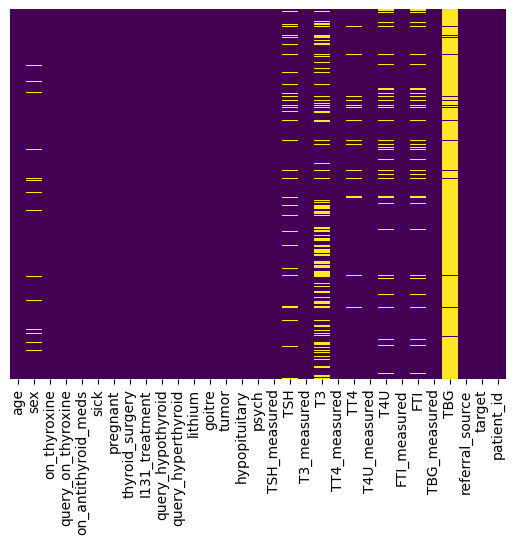

In [ ]:
# Creating Heatmap to check the density of null values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Consider Reasons for Missingness:

- **Missing Completely at Random (MCAR):** No systematic reason for missingness.
- **Missing at Random (MAR):** Missingness depends on observed values.
- **Missing Not at Random (MNAR):** Missingness depends on the unobserved values.

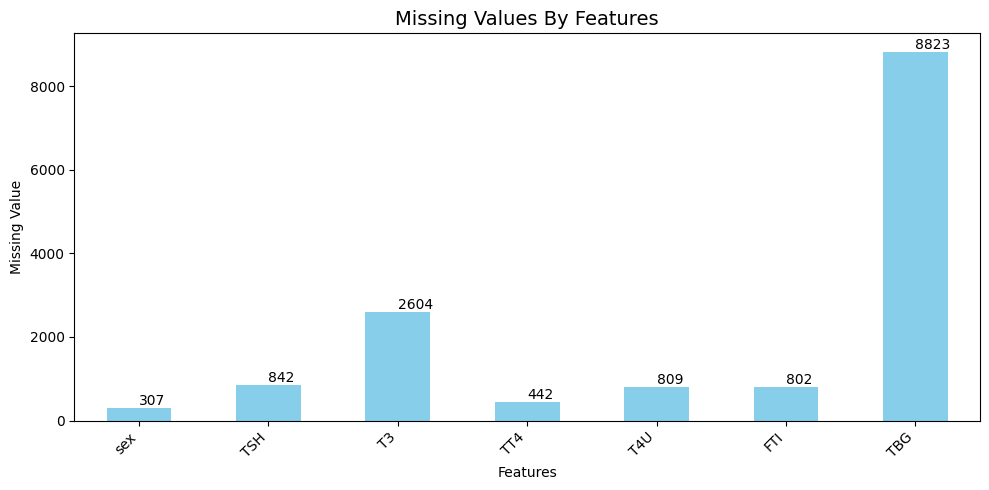

In [ ]:
# Fetching the null values for every feature
missing_data = data.isna().sum()

# Filtering out features with zero null values
missing_data = missing_data[missing_data > 0]

# Plotting the graph
plt.figure(figsize=(10, 5))
bars = missing_data.plot(kind = 'bar', color = 'skyblue')

# Add labels on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # 'int(yval)' ensures integer labels

plt.title('Missing Values By Features', fontsize=14)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Missing Value', fontsize=10)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

We note that there are missing values in some crucial features like 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI' and 'TBG'. To address this, we might use imputation techniques. Also, the number of missing values for TBG is too high (8823 out of 9172) so we will have to drop the feature. Moreover, feature like patient_id is not of much significance so we can drop it too.

In [ ]:
# Dropping TBG and patient_id columns
data.drop(columns=['TBG', 'patient_id'], inplace=True)

For all the features with float data type (TSH, T3, TT4, T4U, FTI, TBG), we will first check their respective distributions in order to make a better decision regarding the statistical measure that can be used for imputation. If the data is fairly normal we will opt for mean and if it is skewed then we will opt for median as it does not get affected by outliers.

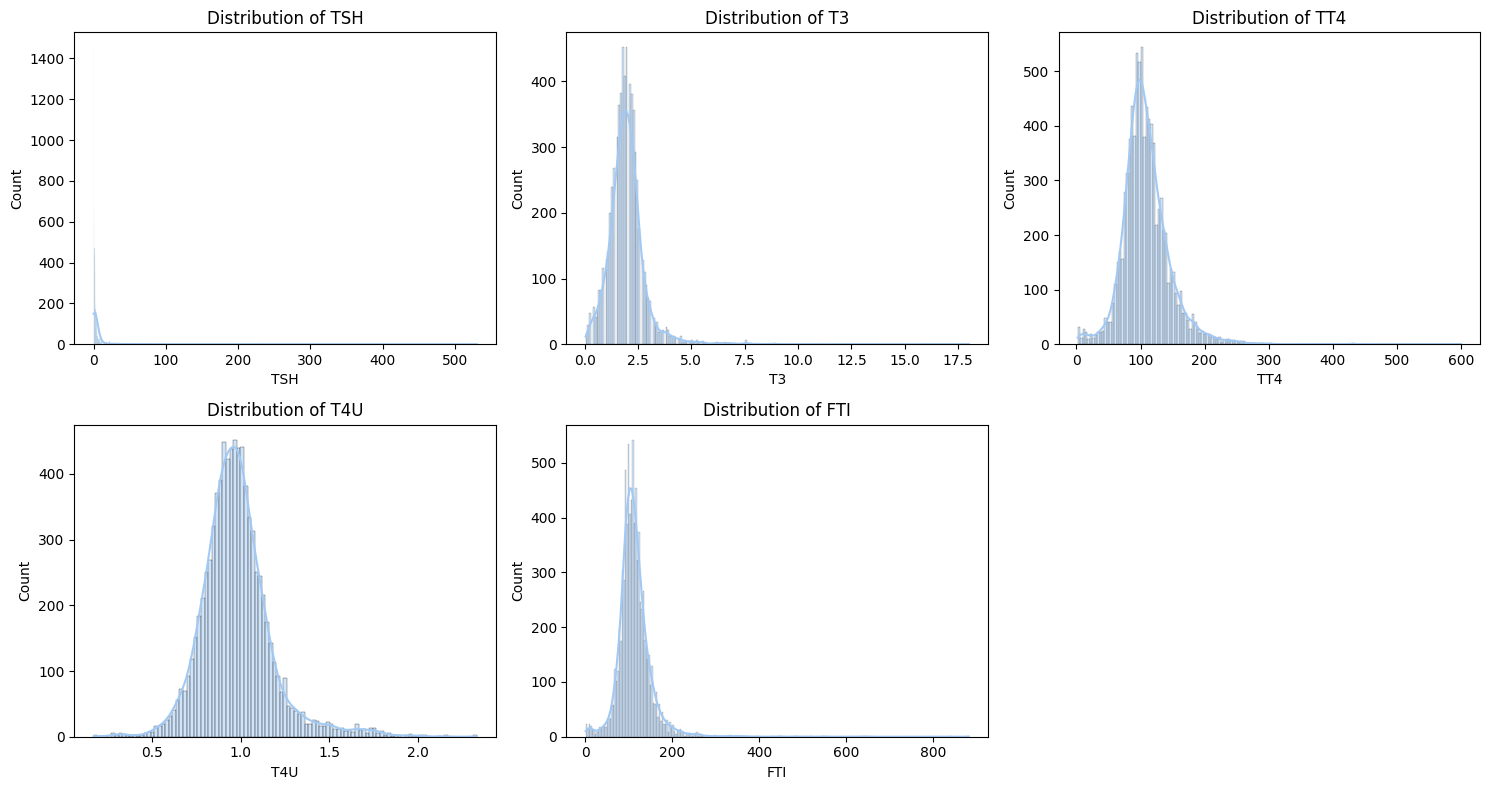

In [ ]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten() # Flatten to 1D for easier indexing

# Iterate over columns and plot histograms
metrics = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i, metric in enumerate(metrics):
    sns.histplot(data[metric], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)


# Remove the empty subplot
fig.delaxes(axes[-1])

# Adjust layout to avoid overlapping titles
plt.tight_layout()
plt.show()

The distributions of TSH, T3, TT4, T4U, and FTI in the ANN Thyroid dataset (for those with measurements taken) exhibit the following characteristics:

**TSH (Thyroid Stimulating Hormone):**

* The distribution is heavily right-skewed, with the majority of values clustered below 5 mU/L.
* There's a long tail extending towards higher TSH values, indicating the presence of individuals with hypothyroidism (underactive thyroid).
* A few outliers exist with very high TSH levels.

**T3 (Total Triiodothyronine):**

* The distribution is approximately normal, centered around 1.5 ng/dL.
* The spread is relatively narrow, suggesting most individuals have T3 levels within a typical range.
* A few outliers exist with very low or high T3 levels.

**TT4 (Total Thyroxine):**

* The distribution is slightly right-skewed, with most values falling between 80 and 120 ng/dL.
* A tail extends towards higher TT4 values, indicating some individuals with hyperthyroidism (overactive thyroid).

**T4U (Thyroxine Uptake):**

* The distribution is roughly normal, centered around 0.9.
* The spread is relatively narrow, similar to T3.

**FTI (Free Thyroxine Index):**

* The distribution is slightly right-skewed, mirroring the TT4 distribution.
* Most values lie between 100 and 140, with a tail extending towards higher values.

**Overall:**

* The distributions of TSH, TT4, and FTI suggest the dataset includes individuals with both hypothyroidism (high TSH, potentially high TT4 and FTI) and hyperthyroidism (low TSH, potentially high TT4 and FTI).
* The T3 and T4U distributions appear more normally distributed, indicating these values are within a typical range for most individuals in the dataset.

## **Splitting Data**

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,target
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,f,other,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,NaN,f,NaN,f,other,-
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,other,-
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,other,-
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,other,S


In [ ]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
# mapping for target variable
map = {'-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid",
 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
 'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid",
 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid",
 "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
 }

In [ ]:
data['target'] = data['target'].map(map)
data.dropna(subset=['target'], inplace=True)

In [ ]:
data['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [ ]:
#Initialising the target variable
target=data["target"]
data=data.drop("target", axis=1)

#Splitting Data for Training (80%) & Testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(data,target,random_state=20,test_size=0.2)
print("Train-Test Split Successful")


Train-Test Split Successful


In [ ]:
target

0       Negative
1       Negative
2       Negative
3       Negative
5       Negative
          ...   
9166    Negative
9167    Negative
9168    Negative
9170    Negative
9171    Negative
Name: target, Length: 7679, dtype: object

In [ ]:
X_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
1881,74,F,f,f,f,f,f,f,f,t,...,t,1.2,t,89.0,t,0.94,t,95.0,f,other
3691,39,M,f,f,f,f,f,f,f,f,...,t,2.7,t,91.0,t,0.92,t,98.0,f,SVHC
2533,43,M,f,f,f,f,f,f,f,f,...,f,NaN,t,65.0,t,0.93,t,70.0,f,other
3074,31,F,f,f,f,f,f,f,f,f,...,t,2.1,t,66.0,t,0.66,t,99.0,f,other
6970,35,M,f,f,f,f,f,f,f,f,...,t,2.3,t,80.0,t,0.64,t,125.0,f,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,75,F,f,f,f,t,f,f,f,f,...,t,1.7,t,103.0,t,0.77,t,134.0,f,SVHD
8842,57,F,f,t,f,f,f,f,f,f,...,t,2.1,t,93.0,t,0.84,t,111.0,f,other
5191,89,F,f,f,f,f,f,f,f,f,...,t,1.8,t,86.0,t,1.04,t,83.0,f,other
3011,67,F,f,f,f,f,f,f,f,f,...,t,1.2,t,90.0,t,0.82,t,110.0,f,SVI


In [ ]:
X_test

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source
6080,29,F,f,f,f,f,f,f,f,f,...,f,NaN,t,119.0,t,0.98,t,121.0,f,other
3599,56,M,f,f,f,f,f,f,f,f,...,t,2.3,t,98.0,t,1.07,t,92.0,f,other
8455,48,F,f,f,f,f,f,f,f,f,...,f,NaN,t,91.0,t,1.04,t,88.0,f,other
4137,71,M,f,f,f,f,f,f,f,t,...,t,0.4,t,37.0,t,0.74,t,50.0,f,SVI
225,64,F,f,f,f,f,f,f,f,f,...,t,1.4,t,96.0,t,1.03,t,93.0,f,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,19,F,f,f,f,f,f,f,f,f,...,f,NaN,t,84.0,t,0.78,t,108.0,f,other
8201,61,F,f,f,f,f,f,f,f,f,...,f,NaN,t,110.0,t,1.11,t,99.0,f,other
420,54,F,f,f,f,f,f,f,f,t,...,t,2.5,t,144.0,t,1.44,t,100.0,f,other
4911,16,F,f,f,f,f,f,f,f,f,...,t,2.6,t,94.0,t,0.94,t,100.0,f,other


## **Null Values Imputation**

In [ ]:
X_train.isnull().sum()

age                       0
sex                     206
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     578
T3_measured               0
T3                     1771
TT4_measured              0
TT4                     277
T4U_measured              0
T4U                     526
FTI_measured              0
FTI                     521
TBG_measured              0
referral_source           0
dtype: int64

In [ ]:
# Imputation using mode for the 'sex' feature
X_train['sex'].fillna(X_train['sex'].mode()[0], inplace=True)

In [ ]:
X_train.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     578
T3_measured               0
T3                     1771
TT4_measured              0
TT4                     277
T4U_measured              0
T4U                     526
FTI_measured              0
FTI                     521
TBG_measured              0
referral_source           0
dtype: int64

In [ ]:
X_train.loc[:,['TSH','T3','TT4','T4U','FTI',]].skew()

TSH    11.929213
T3      4.336510
TT4     1.462158
T4U     0.592793
FTI     3.755610
dtype: float64

**-1.96 to 1.96 - Roughly Normal Distribution**


Imputation - Train set

In [ ]:
# Imputation using median for 'TSH', 'T3' and 'FTI' features
X_train['TSH'].fillna(X_train['TSH'].median(), inplace=True)
X_train['T3'].fillna(X_train['T3'].median(), inplace=True)
X_train['FTI'].fillna(X_train['FTI'].median(), inplace=True)

# Imputation using mean for 'TT4' and 'T4U' features
X_train['TT4'].fillna(X_train['TT4'].mean(), inplace=True)
X_train['T4U'].fillna(X_train['T4U'].mean(), inplace=True)

In [ ]:
X_train.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
dtype: int64

Imputation for Test set

In [ ]:
X_test.isnull().sum()

age                      0
sex                     48
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    146
T3_measured              0
T3                     438
TT4_measured             0
TT4                     77
T4U_measured             0
T4U                    155
FTI_measured             0
FTI                    153
TBG_measured             0
referral_source          0
dtype: int64

In [ ]:
# Imputation using mode for the 'sex' feature
X_test['sex'].fillna(X_train['sex'].mode()[0], inplace=True)

# Imputation using median for 'TSH', 'T3' and 'FTI' features
X_test['TSH'].fillna(X_train['TSH'].median(), inplace=True)
X_test['T3'].fillna(X_train['T3'].median(), inplace=True)
X_test['FTI'].fillna(X_train['FTI'].median(), inplace=True)

# Imputation using mean for 'TT4' and 'T4U' features
X_test['TT4'].fillna(X_train['TT4'].mean(), inplace=True)
X_test['T4U'].fillna(X_train['T4U'].mean(), inplace=True)

X_test.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
dtype: int64

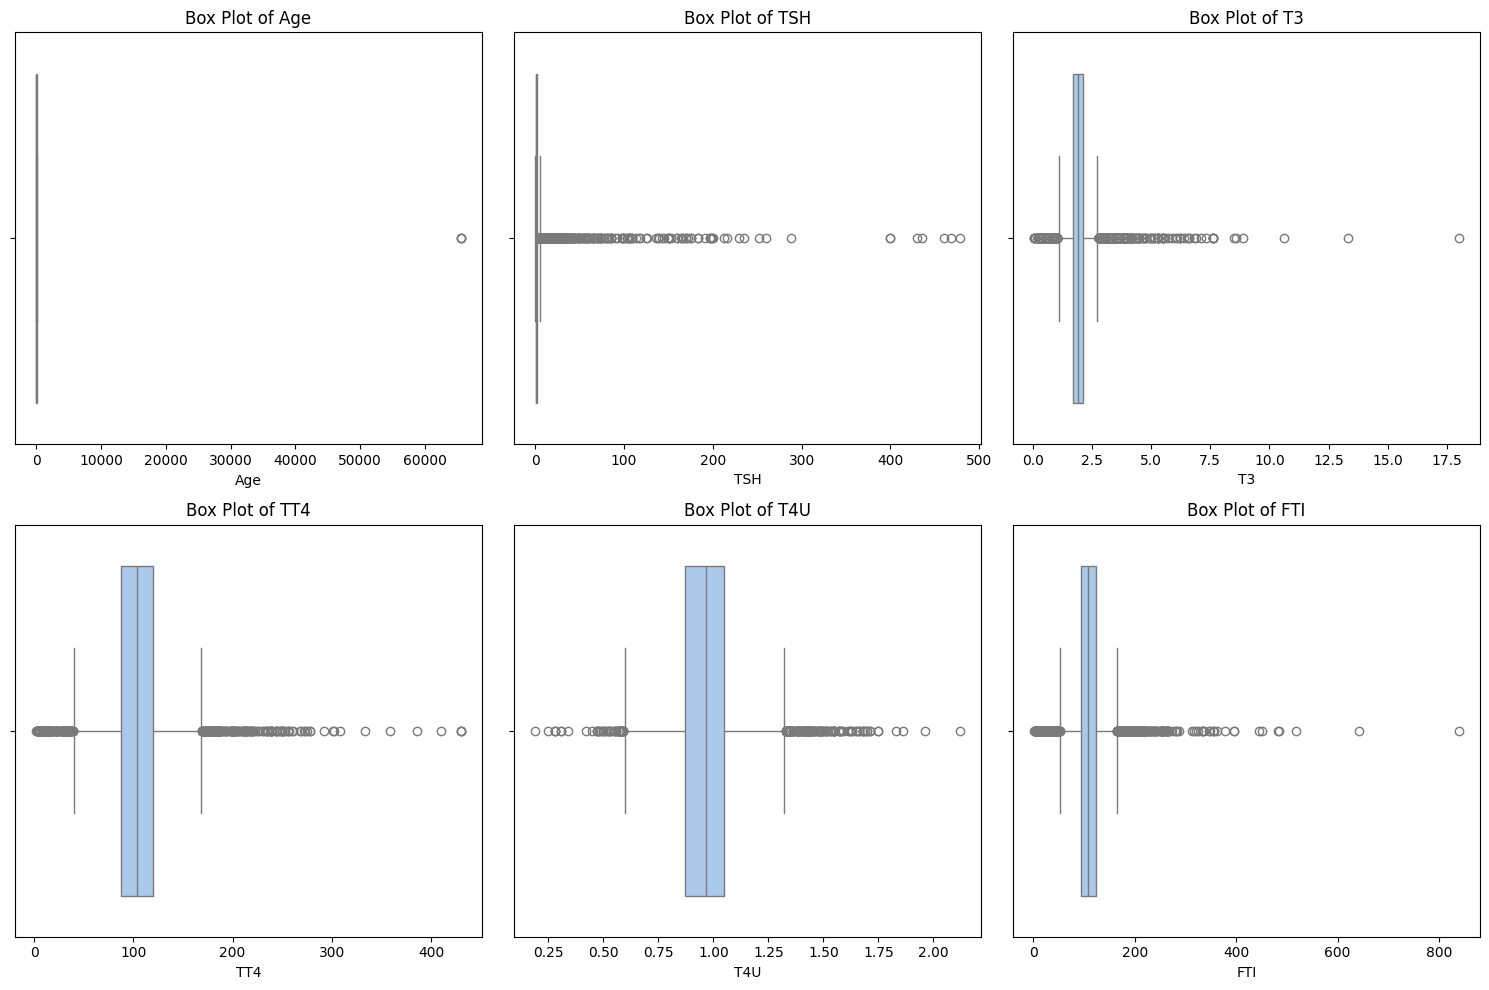

In [ ]:
# Create the boxplot for Age
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
sns.boxplot(x='age', data=X_train)

# Add title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Create the boxplot for TSH
plt.subplot(2, 3, 2)
sns.boxplot(x='TSH', data=X_train)

# Add title and labels
plt.title('Box Plot of TSH')
plt.xlabel('TSH')

# Create the boxplot for T3
plt.subplot(2, 3, 3)
sns.boxplot(x='T3', data=X_train)

# Add title and labels
plt.title('Box Plot of T3')
plt.xlabel('T3')

# Create the boxplot for TT4
plt.subplot(2, 3, 4)
sns.boxplot(x='TT4', data=X_train)

# Add title and labels
plt.title('Box Plot of TT4')
plt.xlabel('TT4')

# Create the boxplot for T4U
plt.subplot(2, 3, 5)
sns.boxplot(x='T4U', data=X_train)

# Add title and labels
plt.title('Box Plot of T4U')
plt.xlabel('T4U')

# Create the boxplot for FTI
plt.subplot(2, 3, 6)
sns.boxplot(x='FTI', data=X_train)

# Add title and labels
plt.title('Box Plot of FTI')
plt.xlabel('FTI')

plt.tight_layout()
plt.show()

### Handling Outliers

### Numerical Data
- if the data is following normal distribution, anything beyond mean + 3SD can be considered as an outlier.
- if the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1 - 1.5 IQR and Q3 + 1.5 IQR.
### Categorical Data
- If the column is highly imbalanced for eg male 10000 and female 2 then we can eliminate female.

In [ ]:
for i in range(len(data_sets)):
  data_sets[i] = data_sets[i][data_sets[i]['age'] < (data_sets[i]['age'].mean() + 3*data_sets[i]['age'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['T3'] < (data_sets[i]['T3'].mean() + 3*data_sets[i]['T3'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['T4U'] < (data_sets[i]['T4U'].mean() + 3*data_sets[i]['T4U'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['TSH'] < (data_sets[i]['TSH'].mean() + 3*data_sets[i]['TSH'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['TT4'] < (data_sets[i]['TT4'].mean() + 3*data_sets[i]['TT4'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['FTI'] < (data_sets[i]['FTI'].mean() + 3*data_sets[i]['FTI'].std())]
  data_sets[i] = data_sets[i][data_sets[i]['age'] <= 100]

## **One hot encoding**

In [ ]:
data_sets =[X_train,X_test]

from sklearn.preprocessing import OneHotEncoder

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

data_sets =[X_train,X_test]
encoded_data_sets = []

encoder = OneHotEncoder(sparse_output=False, drop ='first',handle_unknown='ignore')
encoder.fit(X_train[categorical_columns])



['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source']


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
for i in range(len(data_sets)):
  encoded_array =  encoder.transform(data_sets[i][categorical_columns])
  one_hot_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns), index=data_sets[i].index)
  data = pd.concat([data_sets[i], one_hot_columns_df], axis=1)
  encoded_data_sets.append(data.drop(categorical_columns, axis=1))


X_train = encoded_data_sets[0]
X_train



,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,...,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
1881,74,1.30,1.2,89.0,0.94,95.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3691,39,3.00,2.7,91.0,0.92,98.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2533,43,1.40,1.9,65.0,0.93,70.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3074,31,0.91,2.1,66.0,0.66,99.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6970,35,3.20,2.3,80.0,0.64,125.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,75,1.10,1.7,103.0,0.77,134.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8842,57,1.40,2.1,93.0,0.84,111.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,89,2.50,1.8,86.0,1.04,83.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3011,67,1.10,1.2,90.0,0.82,110.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test = encoded_data_sets[0]
X_test

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,...,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
1881,74,1.30,1.2,89.0,0.94,95.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3691,39,3.00,2.7,91.0,0.92,98.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2533,43,1.40,1.9,65.0,0.93,70.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3074,31,0.91,2.1,66.0,0.66,99.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6970,35,3.20,2.3,80.0,0.64,125.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,75,1.10,1.7,103.0,0.77,134.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8842,57,1.40,2.1,93.0,0.84,111.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,89,2.50,1.8,86.0,1.04,83.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3011,67,1.10,1.2,90.0,0.82,110.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Feature Scaling

In [ ]:
numeric_columns = ['age','TSH','T3','TT4','T4U','FTI']

#We are going MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model = scaler.fit(X_train[numeric_columns])

encoded_and_scaled_data_sets=[]

In [ ]:
for i in range(len(encoded_data_sets)):
  scaled_array =  model.transform(encoded_data_sets[i][numeric_columns])
  scaled_df = pd.DataFrame(scaled_array, columns=numeric_columns, index=encoded_data_sets[i].index)
  for column in numeric_columns:
    encoded_data_sets[i][column] = scaled_df[column]
  encoded_and_scaled_data_sets.append(encoded_data_sets[i])

In [ ]:
X_train = encoded_and_scaled_data_sets[0]
X_test = encoded_and_scaled_data_sets[1]

In [ ]:
X_train

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,...,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
1881,0.001114,0.002709,0.064067,0.203271,0.388601,0.111748,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3691,0.000580,0.006266,0.147632,0.207944,0.378238,0.115330,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2533,0.000641,0.002918,0.103064,0.147196,0.383420,0.081901,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3074,0.000458,0.001893,0.114206,0.149533,0.243523,0.116523,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6970,0.000519,0.006684,0.125348,0.182243,0.233161,0.147564,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,0.001129,0.002291,0.091922,0.235981,0.300518,0.158309,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8842,0.000855,0.002918,0.114206,0.212617,0.336788,0.130850,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5191,0.001343,0.005220,0.097493,0.196262,0.440415,0.097421,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3011,0.001007,0.002291,0.064067,0.205607,0.326425,0.129656,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_meds_t,...,T3_measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,TBG_measured_t,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
6080,0.000427,0.001287,0.103064,0.273364,0.409326,0.142789,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3599,0.000839,0.002918,0.125348,0.224299,0.455959,0.108166,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8455,0.000717,0.002291,0.103064,0.207944,0.440415,0.103391,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4137,0.001068,0.079488,0.019499,0.081776,0.284974,0.058023,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
225,0.000961,0.000094,0.075209,0.219626,0.435233,0.109360,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,0.000275,0.002918,0.103064,0.191589,0.305699,0.127268,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8201,0.000916,0.006893,0.103064,0.252336,0.476684,0.116523,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
420,0.000809,0.006266,0.136490,0.331776,0.647668,0.117717,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4911,0.000229,0.007521,0.142061,0.214953,0.388601,0.117717,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
